In [8]:
## começar PLAY aqui ##
import pandas as pd
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as srn

tabela = pd.read_csv('Pokemon.csv')
tabela

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [9]:
tabela.shape

(800, 13)

# Limpeza de dados 

In [10]:
tabela = tabela.reindex(columns=['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense','Speed','Sp. Atk', 'Sp. Def','Total','Legendary', 'Generation'])
tabela

,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Sp. Atk,Sp. Def,Total,Legendary,Generation
0,Bulbasaur,Grass,Poison,45,49,49,45,65,65,318,False,1
1,Ivysaur,Grass,Poison,60,62,63,60,80,80,405,False,1
2,Venusaur,Grass,Poison,80,82,83,80,100,100,525,False,1
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,80,122,120,625,False,1
4,Charmander,Fire,NaN,39,52,43,65,60,50,309,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,50,100,150,600,True,6
796,DiancieMega Diancie,Rock,Fairy,50,160,110,110,160,110,700,True,6
797,HoopaHoopa Confined,Psychic,Ghost,80,110,60,70,150,130,600,True,6
798,HoopaHoopa Unbound,Psychic,Dark,80,160,60,80,170,130,680,True,6


In [11]:
tabelaPokemon = tabela.rename(columns={'Name': 'nome',
                                       'Type 1': 'tipo',
                                       'Type 2': 'subtipo',
                                        'HP': 'hp',
                                      'Attack': 'ataque',
                                      'Defense': 'defesa',
                                      'Speed': 'velocidade',
                                      'Sp. Atk': 'ataque_x',
                                      'Sp. Def': 'defesa_x',
                                      'Total': 'força_total',
                                      'Legendary': 'raridade',
                                      'Generation': 'geração'})
tabelaPokemon

,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
0,Bulbasaur,Grass,Poison,45,49,49,45,65,65,318,False,1
1,Ivysaur,Grass,Poison,60,62,63,60,80,80,405,False,1
2,Venusaur,Grass,Poison,80,82,83,80,100,100,525,False,1
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,80,122,120,625,False,1
4,Charmander,Fire,NaN,39,52,43,65,60,50,309,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,50,100,150,600,True,6
796,DiancieMega Diancie,Rock,Fairy,50,160,110,110,160,110,700,True,6
797,HoopaHoopa Confined,Psychic,Ghost,80,110,60,70,150,130,600,True,6
798,HoopaHoopa Unbound,Psychic,Dark,80,160,60,80,170,130,680,True,6


In [12]:
tabelaPokemon.dtypes

nome           object
tipo           object
subtipo        object
hp              int64
ataque          int64
defesa          int64
velocidade      int64
ataque_x        int64
defesa_x        int64
força_total     int64
raridade         bool
geração         int64
dtype: object

In [13]:
## limpeza de dados sujos
tabelaPokemon = tabelaPokemon.drop_duplicates()
tabelaPokemon.dropna(axis=0, how='all', inplace=True) # deletas todas linhas que sejam nulass
tabelaPokemon

,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
0,Bulbasaur,Grass,Poison,45,49,49,45,65,65,318,False,1
1,Ivysaur,Grass,Poison,60,62,63,60,80,80,405,False,1
2,Venusaur,Grass,Poison,80,82,83,80,100,100,525,False,1
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,80,122,120,625,False,1
4,Charmander,Fire,NaN,39,52,43,65,60,50,309,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,50,100,150,600,True,6
796,DiancieMega Diancie,Rock,Fairy,50,160,110,110,160,110,700,True,6
797,HoopaHoopa Confined,Psychic,Ghost,80,110,60,70,150,130,600,True,6
798,HoopaHoopa Unbound,Psychic,Dark,80,160,60,80,170,130,680,True,6


In [14]:
## eliminar todos valores nulos, mesmo sendo substituidos por 'NADA'
tabelaPokemon.isnull().sum()

nome             0
tipo             0
subtipo        386
hp               0
ataque           0
defesa           0
velocidade       0
ataque_x         0
defesa_x         0
força_total      0
raridade         0
geração          0
dtype: int64

In [15]:
tabelaPokemon['subtipo'].fillna('NO', inplace=True)

In [16]:
tabelaPokemon.isnull().sum()

nome           0
tipo           0
subtipo        0
hp             0
ataque         0
defesa         0
velocidade     0
ataque_x       0
defesa_x       0
força_total    0
raridade       0
geração        0
dtype: int64

In [17]:
#transformar raridade em multiplas: comum,raro,epico, lendario.
#converter bool para string
tabelaPokemon['raridade'] = tabelaPokemon['raridade'].astype(str)
tabelaPokemon

,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
0,Bulbasaur,Grass,Poison,45,49,49,45,65,65,318,False,1
1,Ivysaur,Grass,Poison,60,62,63,60,80,80,405,False,1
2,Venusaur,Grass,Poison,80,82,83,80,100,100,525,False,1
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,80,122,120,625,False,1
4,Charmander,Fire,NO,39,52,43,65,60,50,309,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,50,100,150,600,True,6
796,DiancieMega Diancie,Rock,Fairy,50,160,110,110,160,110,700,True,6
797,HoopaHoopa Confined,Psychic,Ghost,80,110,60,70,150,130,600,True,6
798,HoopaHoopa Unbound,Psychic,Dark,80,160,60,80,170,130,680,True,6


In [18]:
tabelaPokemon.dtypes

nome           object
tipo           object
subtipo        object
hp              int64
ataque          int64
defesa          int64
velocidade      int64
ataque_x        int64
defesa_x        int64
força_total     int64
raridade       object
geração         int64
dtype: object

In [19]:
#calcular a media da coluna força total - para determinar a raridade
print(tabelaPokemon['força_total'].min())
print(tabelaPokemon['força_total'].mean())
print(tabelaPokemon['força_total'].median())
print(tabelaPokemon['força_total'].max())
print(tabelaPokemon['força_total'].describe())


180
435.1025
450.0
780
count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: força_total, dtype: float64


In [20]:
#180 ate 350-comum
#351 ate 550-raro
#551 ate 699-epico
#700 ate 780-lendario

## loop for                ## passo 2  
for i in range(len(tabelaPokemon)):
    if  tabelaPokemon.loc[i, 'força_total'] >= 700:
        tabelaPokemon.loc[i, 'raridade'] = 'LENDARIO'
    elif (tabelaPokemon.loc[i, 'força_total'] >= 551) & (tabelaPokemon.loc[i, 'força_total'] <= 699)  :
         tabelaPokemon.loc[i, 'raridade'] = 'EPICO'
    elif (tabelaPokemon.loc[i, 'força_total'] >= 351) & (tabelaPokemon.loc[i, 'força_total'] <= 550)  :
         tabelaPokemon.loc[i, 'raridade'] = 'RARO'
    elif tabelaPokemon.loc[i, 'força_total'] <= 350 :
         tabelaPokemon.loc[i, 'raridade'] = 'COMUM'    

In [21]:
tabelaPokemon.groupby(['raridade']).size()

raridade
COMUM       247
EPICO       107
LENDARIO     15
RARO        431
dtype: int64

In [22]:
tabelaPokemon.head()

,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
0,Bulbasaur,Grass,Poison,45,49,49,45,65,65,318,COMUM,1
1,Ivysaur,Grass,Poison,60,62,63,60,80,80,405,RARO,1
2,Venusaur,Grass,Poison,80,82,83,80,100,100,525,RARO,1
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,80,122,120,625,EPICO,1
4,Charmander,Fire,NO,39,52,43,65,60,50,309,COMUM,1


In [23]:
## resolver problema do HP -------  valor abaixo de 20 serao substituidos por 20    ----> passo 1
display(tabelaPokemon.sort_values(['hp'], ascending=True))

,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
316,Shedinja,Bug,Ghost,1,90,45,40,30,30,236,COMUM,3
55,Diglett,Ground,NO,10,55,25,95,35,45,265,COMUM,1
139,Magikarp,Water,NO,20,10,55,80,15,20,200,COMUM,1
388,Duskull,Ghost,NO,20,40,90,25,30,90,295,COMUM,3
487,Mime Jr.,Psychic,Fairy,20,25,45,60,70,90,310,COMUM,4
...,...,...,...,...,...,...,...,...,...,...,...,...
655,Alomomola,Water,NO,165,75,80,65,40,45,470,RARO,5
351,Wailord,Water,NO,170,90,45,60,90,45,500,RARO,3
217,Wobbuffet,Psychic,NO,190,33,58,33,33,58,405,RARO,2
121,Chansey,Normal,NO,250,5,5,50,35,105,450,RARO,1


In [24]:
## transformando os HPs em 20              ----> passo 2
for i in range(len(tabelaPokemon)):
    if  tabelaPokemon.loc[i, 'hp'] < 20:
        tabelaPokemon.loc[i, 'hp'] = 20

display(tabelaPokemon.sort_values(['hp'], ascending=True))

,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
139,Magikarp,Water,NO,20,10,55,80,15,20,200,COMUM,1
388,Duskull,Ghost,NO,20,40,90,25,30,90,295,COMUM,3
487,Mime Jr.,Psychic,Fairy,20,25,45,60,70,90,310,COMUM,4
381,Feebas,Water,NO,20,15,20,80,10,55,200,COMUM,3
186,Pichu,Electric,NO,20,40,15,60,35,35,205,COMUM,2
...,...,...,...,...,...,...,...,...,...,...,...,...
655,Alomomola,Water,NO,165,75,80,65,40,45,470,RARO,5
351,Wailord,Water,NO,170,90,45,60,90,45,500,RARO,3
217,Wobbuffet,Psychic,NO,190,33,58,33,33,58,405,RARO,2
121,Chansey,Normal,NO,250,5,5,50,35,105,450,RARO,1


################################## FINALIZAÇÃO DA LIMPEZA DE DADOS ############################

In [ ]:
##---------------------------------------analize e exploração----------------------------

# PERGUNTA E RESPOSTAS

In [17]:
## algumas perguntas para treino

In [18]:
## que podem tambem ser usada em questao ao TEMA

 Suponha que uma equipe quer separar algumas informações do pokemom, para um card game por exemplo
 ENTÃO AQUI SERA REALIZADA UMA PESQUISA INTERATIVA - PARA EXTRAIR ESSAS INFORMAÇÕES:
 Um card game juntamente com marketing, analisando os pokemons mais raros, fortes,etc.
 Grupos de pokemons que mais se destaca esse para um card game e no marketing. 
 então sera feita uma pesquisa baseada nessa Ideia.

In [25]:
#Quantos são e quais são em termos de raridade?
tabelaPokemon.groupby(['raridade']).size()

raridade
COMUM       247
EPICO       107
LENDARIO     15
RARO        431
dtype: int64

In [26]:
# qual é  pokemon lutador mais forte
pokemomLutador = tabelaPokemon.loc[tabelaPokemon['tipo'] == 'Fighting']
pokemomLutador.groupby('força_total').max()

# resposta
# 625	LucarioMega Lucario	Fighting	Steel	70	145	88	112	140	70	EPICO	4

,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,raridade,geração
força_total,,,,,,,,,,,
210,Tyrogue,Fighting,NO,35,35,35,35,35,35,COMUM,2
237,Makuhita,Fighting,NO,72,60,30,25,20,30,COMUM,3
280,Meditite,Fighting,Psychic,30,40,55,60,40,55,COMUM,3
285,Riolu,Fighting,NO,40,70,40,60,35,40,COMUM,4
305,Timburr,Fighting,NO,75,80,55,70,35,45,COMUM,5
348,Pancham,Fighting,NO,67,82,62,43,46,48,COMUM,6
350,Mienfoo,Fighting,NO,45,85,50,65,55,50,COMUM,5
405,Machoke,Fighting,NO,85,105,85,45,50,60,RARO,5
410,Medicham,Fighting,Psychic,60,60,75,80,60,75,RARO,3


In [27]:
# Qual é o tipo de Pokémon mais frequente na planilha?.size()
tabelaPokemon.groupby(['tipo']).size()

## Water       112

tipo
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
dtype: int64

In [28]:
# Qual é a geração de Pokémon mais fraca em termos de força total?
tal = tabelaPokemon.groupby('força_total')[['nome','força_total','geração']].min()
display(tal.head())

## resposta
# 180	Sunkern geração 2 

,nome,força_total,geração
força_total,,,
180,Sunkern,180,2
190,Azurill,190,3
194,Kricketot,194,4
195,Caterpie,195,1
198,Ralts,198,3


In [29]:
############################ Qual o pokemon mais forte ? ############################################
tabelaPokemon.groupby('força_total').max()
## resposta 
# 780	RayquazaMega Rayquaza	Psychic	NADA	106	190	100	140	194	120	LENDARIO	3

,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,raridade,geração
força_total,,,,,,,,,,,
180,Sunkern,Grass,NO,30,30,30,30,30,30,COMUM,2
190,Azurill,Normal,Fairy,50,20,40,20,20,40,COMUM,3
194,Kricketot,Bug,NO,37,25,41,25,25,41,COMUM,4
195,Wurmple,Bug,Poison,45,45,35,50,20,30,COMUM,3
198,Ralts,Psychic,Fairy,28,25,25,40,45,35,COMUM,3
...,...,...,...,...,...,...,...,...,...,...,...
680,Zekrom,Water,NO,150,160,130,130,170,154,EPICO,6
700,TyranitarMega Tyranitar,Steel,Psychic,125,170,150,120,170,150,LENDARIO,6
720,Arceus,Normal,NO,120,120,120,120,120,120,LENDARIO,4


In [30]:
############################ ANALISAR CADA TIPO DE POKEMONS  ######################   

pokeNormal = tabelaPokemon.loc[tabelaPokemon['tipo'] == 'Normal']
pokeGrass = tabelaPokemon.loc[tabelaPokemon['tipo'] == 'Grass']
pokeBug  = tabelaPokemon.loc[tabelaPokemon['tipo'] == 'Bug']
pokePsychic = tabelaPokemon.loc[tabelaPokemon['tipo'] == 'Psychic']
pokeFire = tabelaPokemon.loc[tabelaPokemon['tipo'] == 'Fire']
pokeElectric = tabelaPokemon.loc[tabelaPokemon['tipo'] == 'Electric']
pokeRock = tabelaPokemon.loc[tabelaPokemon['tipo'] == 'Rock']
pokeDragon = tabelaPokemon.loc[tabelaPokemon['tipo'] == 'Dragon']
pokeDark = tabelaPokemon.loc[tabelaPokemon['tipo'] == 'Dark']
pokePoison = tabelaPokemon.loc[tabelaPokemon['tipo'] == 'Poison']
pokeSteel  = tabelaPokemon.loc[tabelaPokemon['tipo'] == 'Steel']
pokeFighting  = tabelaPokemon.loc[tabelaPokemon['tipo'] == 'Fighting']
pokeIce = tabelaPokemon.loc[tabelaPokemon['tipo'] == 'Ice']
pokeFairy = tabelaPokemon.loc[tabelaPokemon['tipo'] == 'Fairy']
pokeFlying  = tabelaPokemon.loc[tabelaPokemon['tipo'] == 'Flying']
pokeWater = tabelaPokemon.loc[tabelaPokemon['tipo'] == 'Water']

In [31]:
################################   ANALISAR A MEDIA DO HP DE CADA TIPO ################## ETC
print(pokeNormal['hp'].max())
print(pokeGrass['hp'].max())
print(pokeBug['hp'].max())
print(pokePsychic['hp'].max())
print(pokeFire['hp'].max())
print(pokeElectric['hp'].max())
print(pokeRock['hp'].max())
print(pokeDragon['hp'].max())
print(pokeDark['hp'].max())
print(pokePoison['hp'].max())
print(pokeSteel['hp'].max())
print(pokeFighting['hp'].max())
print(pokeIce['hp'].max())
print(pokeFairy['hp'].max())
print(pokeFlying['hp'].max())
print(pokeWater['hp'].max())


255
123
86
190
115
90
123
125
126
105
100
144
110
126
85
170


In [32]:
## AQUI TEMMOS AS INFORMAÇOES DE CADA TIPO DE POKEMON, DO MAIS FRACO AO MAIS FORTE DE CADA TIPO ##
## È POSSIVEL RESPONDER O POKEMON MAIS FORTE DE CADA TIPO : EX
## resposta -> POKEMOM NORMAL 720, POKEMOM PSYCHIC 780, POKEMOM DRAGON 780, POKEMOM WATER 770

print('POKEMOM NORMAL')
display(pokeNormal['força_total'].describe())

print('POKEMOM GRASS')
display(pokeGrass['força_total'].describe())

print('POKEMOM BUG')
display(pokeBug['força_total'].describe())

print('POKEMOM PSYCHIC')
display(pokePsychic['força_total'].describe())

print('POKEMOM FIRE')
display(pokeFire['força_total'].describe())

print('POKEMOM ELECTRIC')
display(pokeElectric['força_total'].describe())

print('POKEMOM GRASS')
display(pokeGrass['força_total'].describe())
      
print('POKEMOM ROCK')
display(pokeRock['força_total'].describe())

print('POKEMOM DRAGON')
display(pokeDragon['força_total'].describe())
      
print('POKEMOM DARK')
display(pokeDark['força_total'].describe())

print('POKEMOM DRAGON')
display(pokeDragon['força_total'].describe())
      
print('POKEMOM POISON')
display(pokePoison['força_total'].describe())

print('POKEMOM STEEL')
display(pokeSteel['força_total'].describe())

print('POKEMOM FIGHTING')
display(pokeFighting['força_total'].describe())
      
print('POKEMOM ICE')
display(pokeIce['força_total'].describe())

print('POKEMOM FAIRY')
display(pokeFairy['força_total'].describe())
      
print('POKEMOM FLY')
display(pokeFlying['força_total'].describe())
      
print('POKEMOM WATER')
display(pokeWater['força_total'].describe())

POKEMOM NORMAL


count     98.000000
mean     401.683673
std      115.733038
min      190.000000
25%      302.500000
50%      415.000000
75%      481.500000
max      720.000000
Name: força_total, dtype: float64

POKEMOM GRASS


count     70.000000
mean     421.142857
std      106.650626
min      180.000000
25%      318.500000
50%      430.000000
75%      497.000000
max      630.000000
Name: força_total, dtype: float64

POKEMOM BUG


count     69.000000
mean     378.927536
std      117.875223
min      194.000000
25%      269.000000
50%      395.000000
75%      475.000000
max      600.000000
Name: força_total, dtype: float64

POKEMOM PSYCHIC


count     57.000000
mean     475.947368
std      139.026645
min      198.000000
25%      336.000000
50%      485.000000
75%      600.000000
max      780.000000
Name: força_total, dtype: float64

POKEMOM FIRE


count     52.000000
mean     458.076923
std      109.760496
min      250.000000
25%      368.000000
50%      482.000000
75%      534.000000
max      680.000000
Name: força_total, dtype: float64

POKEMOM ELECTRIC


count     44.000000
mean     443.409091
std      105.721952
min      205.000000
25%      362.250000
50%      477.500000
75%      520.000000
max      610.000000
Name: força_total, dtype: float64

POKEMOM GRASS


count     70.000000
mean     421.142857
std      106.650626
min      180.000000
25%      318.500000
50%      430.000000
75%      497.000000
max      630.000000
Name: força_total, dtype: float64

POKEMOM ROCK


count     44.000000
mean     453.750000
std      108.059227
min      280.000000
25%      360.250000
50%      467.500000
75%      516.500000
max      700.000000
Name: força_total, dtype: float64

POKEMOM DRAGON


count     32.000000
mean     550.531250
std      146.267538
min      300.000000
25%      420.000000
50%      600.000000
75%      680.000000
max      780.000000
Name: força_total, dtype: float64

POKEMOM DARK


count     31.000000
mean     445.741935
std      109.126217
min      220.000000
25%      359.000000
50%      465.000000
75%      510.000000
max      680.000000
Name: força_total, dtype: float64

POKEMOM DRAGON


count     32.000000
mean     550.531250
std      146.267538
min      300.000000
25%      420.000000
50%      600.000000
75%      680.000000
max      780.000000
Name: força_total, dtype: float64

POKEMOM POISON


count     28.000000
mean     399.142857
std       92.358687
min      245.000000
25%      323.750000
50%      401.500000
75%      490.000000
max      535.000000
Name: força_total, dtype: float64

POKEMOM STEEL


count     27.000000
mean     487.703704
std      115.420907
min      300.000000
25%      425.000000
50%      500.000000
75%      580.000000
max      700.000000
Name: força_total, dtype: float64

POKEMOM FIGHTING


count     27.000000
mean     416.444444
std      102.464378
min      210.000000
25%      326.500000
50%      455.000000
75%      497.500000
max      625.000000
Name: força_total, dtype: float64

POKEMOM ICE


count     24.000000
mean     433.458333
std      108.281027
min      250.000000
25%      305.000000
50%      467.500000
75%      526.250000
max      580.000000
Name: força_total, dtype: float64

POKEMOM FAIRY


count     17.000000
mean     413.176471
std      123.781680
min      218.000000
25%      323.000000
50%      405.000000
75%      483.000000
max      680.000000
Name: força_total, dtype: float64

POKEMOM FLY


count      4.000000
mean     485.000000
std      161.400124
min      245.000000
25%      462.500000
50%      557.500000
75%      580.000000
max      580.000000
Name: força_total, dtype: float64

POKEMOM WATER


count    112.000000
mean     430.455357
std      113.188266
min      200.000000
25%      328.750000
50%      455.000000
75%      502.250000
max      770.000000
Name: força_total, dtype: float64

In [33]:
# Quais e quantos subtipos de pokemons são mais presentes 
tabelaPokemon.subtipo.value_counts()

NO          386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: subtipo, dtype: int64

In [34]:
## quantos pokemons de cada geração - > PARA FAZER BUSTERS
pokeG_1 = tabelaPokemon[tabelaPokemon['geração'] == 1]
pokeG_2 = tabelaPokemon[tabelaPokemon['geração'] == 2]
pokeG_3 = tabelaPokemon[tabelaPokemon['geração'] == 3]
pokeG_4 = tabelaPokemon[tabelaPokemon['geração'] == 4]
pokeG_5 = tabelaPokemon[tabelaPokemon['geração'] == 5]
pokeG_6 = tabelaPokemon[tabelaPokemon['geração'] == 6]

In [35]:
print(pokeG_1.shape)
print(pokeG_2.shape)
print(pokeG_3.shape)
print(pokeG_4.shape)
print(pokeG_5.shape)

(166, 12)
(106, 12)
(160, 12)
(121, 12)
(165, 12)


In [30]:
################## FIM DAS QUESTÕES  ###############################################

## POKEMONS COMUNs - Análise

In [36]:
#Quantos são e quais são os Pokémons comuns em termos de raridade?
pokemomComum = tabelaPokemon.loc[tabelaPokemon['raridade'] == 'COMUM']
display(pokemomComum.head())
print(pokemomComum.shape)


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
0,Bulbasaur,Grass,Poison,45,49,49,45,65,65,318,COMUM,1
4,Charmander,Fire,NO,39,52,43,65,60,50,309,COMUM,1
9,Squirtle,Water,NO,44,48,65,43,50,64,314,COMUM,1
13,Caterpie,Bug,NO,45,30,35,45,20,20,195,COMUM,1
14,Metapod,Bug,NO,50,20,55,30,25,25,205,COMUM,1


(247, 12)


In [37]:
############################### PEGAR OS MELHORES POKEMONS COMUNS #################
# saber a capacidade de cada categoria.
print("-------------ATQ------------------")
print(pokemomComum['ataque'].min())
print(pokemomComum['ataque'].median())
print(pokemomComum['ataque'].max())
print("----------------------------------------")
#####################################
print("-------------DF-----------------")
print(pokemomComum['defesa'].min())
print(pokemomComum['defesa'].median())
print(pokemomComum['defesa'].max())
print("----------------------------------------")
#############################
print("-------------HP------------------")
print(pokemomComum['hp'].min())
print(pokemomComum['hp'].median())
print(pokemomComum['hp'].max())
print("----------------------------------------")
#####################################
print("-------------VEL------------------")
print(pokemomComum['velocidade'].min())
print(pokemomComum['velocidade'].median())
print(pokemomComum['velocidade'].max())
#display(pokemomComum['velocidade'].describe())
print("----------------------------------------")
############################################
print("-------------força_total------------------")
print(pokemomComum['força_total'].min())
print(pokemomComum['força_total'].median())
print(pokemomComum['força_total'].max())
#################################################3333
print("-------------ataque_x------------------")
print(pokemomComum['ataque_x'].describe())
#################################################3333
print("-------------defesa_x------------------")
print(pokemomComum['defesa_x'].describe())

-------------ATQ------------------
5
50.0
125
----------------------------------------
-------------DF-----------------
5
48.0
118
----------------------------------------
-------------HP------------------
20
45.0
115
----------------------------------------
-------------VEL------------------
10
45.0
100
----------------------------------------
-------------força_total------------------
180
303.0
350
-------------ataque_x------------------
count    247.000000
mean      45.991903
std       16.673818
min       10.000000
25%       35.000000
50%       44.000000
75%       58.500000
max      105.000000
Name: ataque_x, dtype: float64
-------------defesa_x------------------
count    247.000000
mean      47.708502
std       15.381201
min       20.000000
25%       37.500000
50%       45.000000
75%       55.000000
max      120.000000
Name: defesa_x, dtype: float64


In [38]:
# pokemons comuns com maior ataque,def,hp, etc, os mais fortes , combinados
display(pokemomComum.loc[pokemomComum['ataque'] >= 110])
display(pokemomComum.loc[pokemomComum['defesa'] >= 118])
display(pokemomComum.loc[(pokemomComum['ataque'] >= 80) & (pokemomComum['defesa'] >= 95)] )
display(pokemomComum.loc[(pokemomComum['ataque'] >= 50) & (pokemomComum['defesa'] >= 60) & (pokemomComum['hp'] >= 80) ])
display(pokemomComum.loc[pokemomComum['força_total'] >= 350])
display(pokemomComum.loc[pokemomComum['velocidade'] >= 100])
display(pokemomComum.loc[(pokemomComum['velocidade'] >= 90) & (pokemomComum['ataque'] >= 55)])
display(pokemomComum.loc[pokemomComum['defesa_x'] >= 120])
display(pokemomComum.loc[pokemomComum['ataque_x'] >= 105])

,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
453,Cranidos,Rock,NO,67,125,40,58,30,30,350,COMUM,4


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
455,Shieldon,Rock,Steel,30,42,118,30,42,88,350,COMUM,4


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
80,Geodude,Rock,Ground,40,80,100,20,30,30,300,COMUM,1
119,Rhyhorn,Ground,Rock,80,85,95,25,30,30,345,COMUM,1
486,Bonsly,Rock,NO,50,80,95,10,10,45,290,COMUM,4
748,Honedge,Steel,Ghost,45,80,100,28,35,37,325,COMUM,6


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
85,Slowpoke,Water,Psychic,90,65,65,15,40,40,315,COMUM,1
119,Rhyhorn,Ground,Rock,80,85,95,25,30,30,345,COMUM,1
250,Phanpy,Ground,NO,90,60,60,40,40,40,330,COMUM,2


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
63,Growlithe,Fire,NO,55,70,45,60,70,50,350,COMUM,1
453,Cranidos,Rock,NO,67,125,40,58,30,30,350,COMUM,4
455,Shieldon,Rock,Steel,30,42,118,30,42,88,350,COMUM,4
474,Buneary,Normal,NO,55,66,44,85,44,56,350,COMUM,4
680,Mienfoo,Fighting,NO,45,85,50,65,55,50,350,COMUM,5
688,Rufflet,Normal,Flying,70,83,50,60,37,50,350,COMUM,5
740,Skiddo,Grass,NO,66,65,48,52,62,57,350,COMUM,6


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
108,Voltorb,Electric,NO,40,30,50,100,55,55,330,COMUM,1


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
30,Pikachu,Electric,NO,35,55,40,90,50,50,320,COMUM,1
55,Diglett,Ground,NO,20,55,25,95,35,45,265,COMUM,1


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
508,Mantyke,Water,Flying,45,20,50,50,60,120,345,COMUM,4


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
68,Abra,Psychic,NO,25,20,15,90,105,55,310,COMUM,1
638,Solosis,Psychic,NO,45,30,40,20,105,50,290,COMUM,5


In [39]:
## POKEMONS ESCOLHIDOS PARA EXPLORAÇÃO 
pokemonComumTops = pokemomComum.loc[pokemomComum['força_total'] >= 350]
display(pokemonComumTops.head())

,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
63,Growlithe,Fire,NO,55,70,45,60,70,50,350,COMUM,1
453,Cranidos,Rock,NO,67,125,40,58,30,30,350,COMUM,4
455,Shieldon,Rock,Steel,30,42,118,30,42,88,350,COMUM,4
474,Buneary,Normal,NO,55,66,44,85,44,56,350,COMUM,4
680,Mienfoo,Fighting,NO,45,85,50,65,55,50,350,COMUM,5


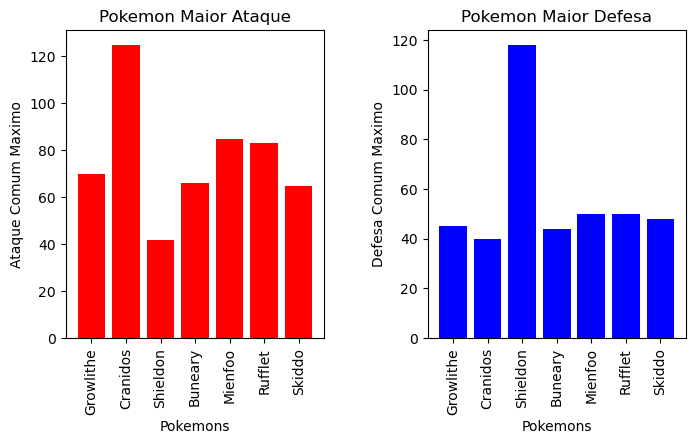

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Dados graficos

valores1 = pokemonComumTops['ataque']
valores2 = pokemonComumTops['defesa']
nomeMaiorAtaque = pokemonComumTops['nome']
nomeMaiorDefesa = pokemonComumTops['nome']

# Cria a figura com duas subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Cria o gráfico de barras na subplot da esquerda
ax1.bar(np.arange(len(nomeMaiorAtaque)), valores1, color='red')
ax1.set_xticks(np.arange(len(nomeMaiorAtaque)))
ax1.set_xticklabels(nomeMaiorAtaque, rotation=90)
ax1.set_xlabel('Pokemons')
ax1.set_ylabel('Ataque Comum Maximo')
ax1.set_title('Pokemon Maior Ataque')

# Cria o gráfico de barras na subplot da direita
ax2.bar(np.arange(len(nomeMaiorDefesa)), valores2, color='blue')
ax2.set_xticks(np.arange(len(nomeMaiorDefesa)))
ax2.set_xticklabels(nomeMaiorDefesa, rotation=90)
ax2.set_xlabel('Pokemons')
ax2.set_ylabel('Defesa Comum Maximo')
ax2.set_title('Pokemon Maior Defesa')

# Ajusta a posição dos subplots
fig.subplots_adjust(wspace=0.4)

# Mostra o gráfico
plt.show()

In [43]:
## filtrar os melhores pokemons COMUNS 
## pode refletir uma ideia de cards brilhantes tirados em boosters, POKEMONS COMUNS EXCLUSIVOS
pokeMelhores = pokemomComum.loc[(pokemomComum['ataque'] >= 50) & (pokemomComum['defesa'] >= 60) & (pokemomComum['hp'] >= 80)  & (pokemomComum['velocidade'] >= 90) | (pokemomComum['força_total'] >= 350) | (pokemomComum['defesa_x'] >= 120) | (pokemomComum['ataque_x'] >= 105)]
pokeMelhores.groupby(['tipo']).size()
pokeMelhores[['nome','tipo']].sort_index()

,nome,tipo
63,Growlithe,Fire
68,Abra,Psychic
453,Cranidos,Rock
455,Shieldon,Rock
474,Buneary,Normal
508,Mantyke,Water
638,Solosis,Psychic
680,Mienfoo,Fighting
688,Rufflet,Normal
740,Skiddo,Grass


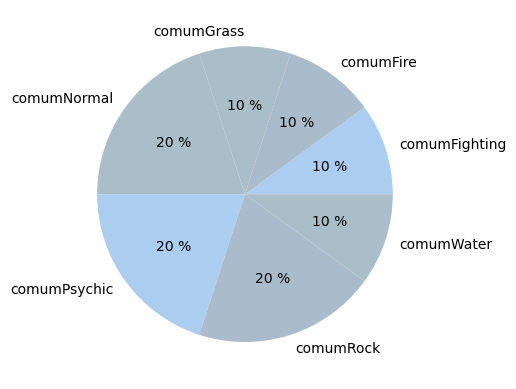

In [45]:
## QUAIS TIPO COMUNS SÃO MAIS PRESENTES ---- 

comumFighting = pokeMelhores.loc[pokeMelhores['tipo'] == 'Fighting'].count()[0]
comumFire =     pokeMelhores.loc[pokeMelhores['tipo'] == 'Fire'].count()[0]
comumGrass =    pokeMelhores.loc[pokeMelhores['tipo'] == 'Grass'].count()[0]
comumNormal =   pokeMelhores.loc[pokeMelhores['tipo'] == 'Normal'].count()[0]
comumPsychic =  pokeMelhores.loc[pokeMelhores['tipo'] == 'Psychic'].count()[0]
comumRock =     pokeMelhores.loc[pokeMelhores['tipo'] == 'Rock'].count()[0]
comumWater =    pokeMelhores.loc[pokeMelhores['tipo'] == 'Water'].count()[0]

labels = ['comumFighting', 'comumFire','comumGrass','comumNormal','comumPsychic', 'comumRock','comumWater']
colors = ['#abcdef','#aabbcc','#aabeca', '#aabeca']

plt.pie([comumFighting, comumFire, comumGrass, comumNormal, comumPsychic, comumRock, comumWater], labels = labels, colors=colors, autopct='%.0f %%')

plt.show()

In [ ]:
##### finalização dos pokemons comuns ################

##  POKEMONS RAROs - Análise

In [47]:
#Quantos são e quais são os Pokémons raros ?
pokeRaro = tabelaPokemon.loc[tabelaPokemon['raridade'] == 'RARO']
display(pokeRaro.head())
print(pokeRaro.shape)


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
1,Ivysaur,Grass,Poison,60,62,63,60,80,80,405,RARO,1
2,Venusaur,Grass,Poison,80,82,83,80,100,100,525,RARO,1
5,Charmeleon,Fire,NO,58,64,58,80,80,65,405,RARO,1
6,Charizard,Fire,Flying,78,84,78,100,109,85,534,RARO,1
10,Wartortle,Water,NO,59,63,80,58,65,80,405,RARO,1


(431, 12)


In [48]:
############################### PEGAR OS MELHORES POKEMONS COMUNS #################
# saber a capacidade de cada categoria.
print("-------------ATQ------------------")
print(pokeRaro['ataque'].min())
print(pokeRaro['ataque'].median())
print(pokeRaro['ataque'].max())
print("----------------------------------------")
#####################################
print("-------------DF-----------------")
print(pokeRaro['defesa'].min())
print(pokeRaro['defesa'].median())
print(pokeRaro['defesa'].max())
print("----------------------------------------")
#############################
print("-------------HP------------------")
print(pokeRaro['hp'].min())
print(pokeRaro['hp'].median())
print(pokeRaro['hp'].max())
print("----------------------------------------")
#####################################
print("-------------VEL------------------")
print(pokeRaro['velocidade'].min())
print(pokeRaro['velocidade'].median())
print(pokeRaro['velocidade'].max())
#display(pokemomComum['velocidade'].describe())
print("----------------------------------------")
############################################
print("-------------força_total------------------")
print(pokeRaro['força_total'].min())
print(pokeRaro['força_total'].median())
print(pokeRaro['força_total'].max())
#################################################3333
print("-------------ataque_x------------------")
print(pokeRaro['ataque_x'].describe())
#################################################3333
print("-------------defesa_x------------------")
print(pokeRaro['defesa_x'].describe())

-------------ATQ------------------
5
82.0
165
----------------------------------------
-------------DF-----------------
5
75.0
230
----------------------------------------
-------------HP------------------
20
70.0
255
----------------------------------------
-------------VEL------------------
5
70.0
160
----------------------------------------
-------------força_total------------------
351
475.0
550
-------------ataque_x------------------
count    431.000000
mean      75.921114
std       24.232753
min       10.000000
25%       59.000000
50%       75.000000
75%       94.500000
max      150.000000
Name: ataque_x, dtype: float64
-------------defesa_x------------------
count    431.000000
mean      77.294664
std       22.426084
min       35.000000
25%       60.000000
50%       75.000000
75%       90.000000
max      230.000000
Name: defesa_x, dtype: float64


In [49]:
# pokemons comuns com maior ataque,def,hp, etc, os mais fortes , combinados
display(pokeRaro.loc[pokeRaro['ataque'] >= 160])
display(pokeRaro.loc[(pokeRaro['ataque'] >= 100) & (pokeRaro['defesa'] >= 170)] )
display(pokeRaro.loc[(pokeRaro['ataque'] >= 90) & (pokeRaro['defesa'] >= 100) & (pokeRaro['hp'] >= 100) ]                  )
display(pokeRaro.loc[pokeRaro['força_total'] >= 550])
display(pokeRaro.loc[pokeRaro['velocidade'] >= 160])
display(pokeRaro.loc[(pokeRaro['velocidade'] >= 120) & (pokeRaro['ataque'] >= 120)])
display(pokeRaro.loc[pokeRaro['defesa_x'] >= 230])
display(pokeRaro.loc[pokeRaro['ataque_x'] >= 150])

,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
454,Rampardos,Rock,NO,97,165,60,58,65,50,495,RARO,4


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
332,Aggron,Steel,Rock,70,110,180,50,60,60,530,RARO,3
789,Avalugg,Ice,NO,95,117,184,28,44,46,514,RARO,6


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
120,Rhydon,Ground,Rock,105,130,120,40,45,45,485,RARO,1
404,Relicanth,Water,Rock,100,90,130,55,45,65,485,RARO,3
500,Hippowdon,Ground,NO,108,112,118,47,68,72,525,RARO,4
515,Rhyperior,Ground,Rock,115,140,130,40,55,55,535,RARO,4
516,Tangrowth,Grass,NO,100,100,125,50,110,50,535,RARO,4


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
698,Volcarona,Bug,Fire,85,60,65,100,135,105,550,RARO,5


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
315,Ninjask,Bug,Flying,61,90,45,160,50,50,456,RARO,3


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
19,BeedrillMega Beedrill,Bug,Poison,65,150,40,145,15,80,495,RARO,1
512,Weavile,Dark,Ice,70,120,65,125,45,85,510,RARO,4


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
230,Shuckle,Bug,Rock,20,10,230,5,10,230,505,RARO,2


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
750,AegislashBlade Forme,Steel,Ghost,60,150,50,60,150,50,520,RARO,6


In [51]:
## DESTAQUE POKEMONS RAROS 
pokemonRaroTops = pokeRaro.loc[(pokeRaro['ataque'] >= 90) & (pokeRaro['defesa'] >= 100) & (pokeRaro['hp'] >= 100) ]     

In [53]:
pokemonRaroTops.shape

(5, 12)

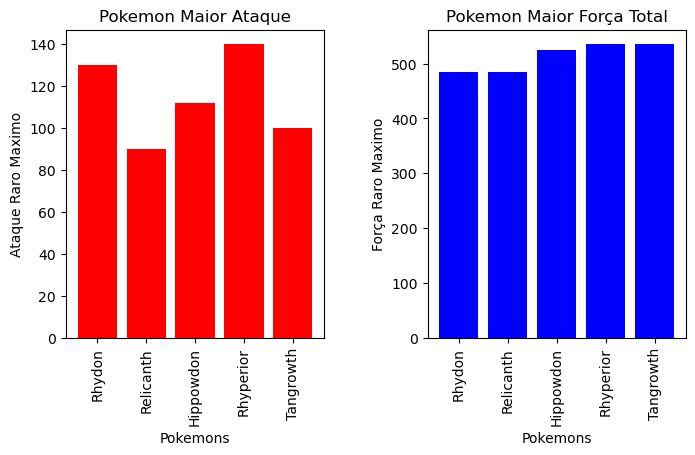

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo
# Cria os dados fictícios
valores1 = pokemonRaroTops['ataque']
valores2 = pokemonRaroTops['força_total']
nomeMaiorAtaque = pokemonRaroTops['nome']
nomeMaiorDefesa = pokemonRaroTops['nome']

# Cria a figura com duas subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Cria o gráfico de barras na subplot da esquerda
ax1.bar(np.arange(len(nomeMaiorAtaque)), valores1, color='red')
ax1.set_xticks(np.arange(len(nomeMaiorAtaque)))
ax1.set_xticklabels(nomeMaiorAtaque, rotation=90)
ax1.set_xlabel('Pokemons')
ax1.set_ylabel('Ataque Raro Maximo')
ax1.set_title('Pokemon Maior Ataque')

# Cria o gráfico de barras na subplot da direita
ax2.bar(np.arange(len(nomeMaiorDefesa)), valores2, color='blue')
ax2.set_xticks(np.arange(len(nomeMaiorDefesa)))
ax2.set_xticklabels(nomeMaiorDefesa, rotation=90)
ax2.set_xlabel('Pokemons')
ax2.set_ylabel('Força Raro Maximo')
ax2.set_title('Pokemon Maior Força Total')

# Ajusta a posição dos subplots
fig.subplots_adjust(wspace=0.4)

# Mostra o gráfico
plt.show()

In [55]:
pokemonRaroTops.groupby('tipo').size()

tipo
Grass     1
Ground    3
Water     1
dtype: int64

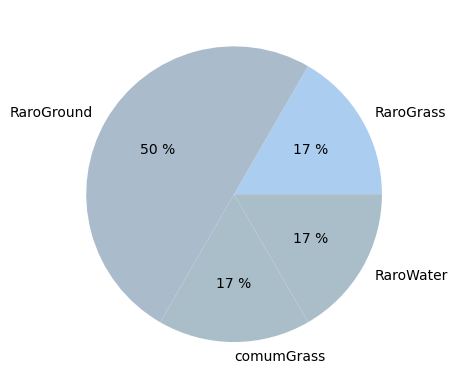

In [57]:
## RAROS EM DESTAQUE ---- POKEMONS DE CARDS BRILHANTES
RaroGrass   = pokemonRaroTops.loc[pokemonRaroTops['tipo'] == 'Grass'].count()[0]
RaroGround  = pokemonRaroTops.loc[pokemonRaroTops['tipo'] == 'Ground'].count()[0]
RaroWater   = pokemonRaroTops.loc[pokemonRaroTops['tipo'] == 'Water'].count()[0]

labels = ['RaroGrass', 'RaroGround','comumGrass','RaroWater']
colors = ['#abcdef','#aabbcc','#aabeca', '#aabeca']

plt.pie([RaroGrass, RaroGround, comumGrass, RaroWater], labels = labels, colors=colors, autopct='%.0f %%')

plt.show()

In [ ]:
## FINALIZAÇÃO POKEMONS RAROS

##  POKEMONS EPICOs - Análise

In [60]:
#Quantos são e quais são os Pokémons Epicos?
pokeEpico = tabelaPokemon.loc[tabelaPokemon['raridade'] == 'EPICO']
display(pokeEpico.head())


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,80,122,120,625,EPICO,1
7,CharizardMega Charizard X,Fire,Dragon,78,130,111,100,130,85,634,EPICO,1
8,CharizardMega Charizard Y,Fire,Flying,78,104,78,100,159,115,634,EPICO,1
12,BlastoiseMega Blastoise,Water,NO,79,103,120,78,135,115,630,EPICO,1
23,PidgeotMega Pidgeot,Normal,Flying,83,80,80,121,135,80,579,EPICO,1


In [61]:
############################### PEGAR OS MELHORES POKEMONS Epicos #################
# saber a capacidade de cada categoria.
print("-------------ATQ------------------")
print(pokeEpico['ataque'].min())
print(pokeEpico['ataque'].median())
print(pokeEpico['ataque'].max())
print("----------------------------------------")
#####################################
print("-------------DF-----------------")
print(pokeEpico['defesa'].min())
print(pokeEpico['defesa'].median())
print(pokeEpico['defesa'].max())
print("----------------------------------------")
#############################
print("-------------HP------------------")
print(pokeEpico['hp'].min())
print(pokeEpico['hp'].median())
print(pokeEpico['hp'].max())
print("----------------------------------------")
#####################################
print("-------------VEL------------------")
print(pokeEpico['velocidade'].min())
print(pokeEpico['velocidade'].median())
print(pokeEpico['velocidade'].max())
#display(pokemomComum['velocidade'].describe())
print("----------------------------------------")
############################################
print("-------------força_total------------------")
print(pokeEpico['força_total'].min())
print(pokeEpico['força_total'].median())
print(pokeEpico['força_total'].max())
#################################################3333
print("-------------ataque_x------------------")
print(pokeEpico['ataque_x'].describe())
#################################################3333
print("-------------defesa_x------------------")
print(pokeEpico['defesa_x'].describe())

-------------ATQ------------------
50
110.0
185
----------------------------------------
-------------DF-----------------
20
95.0
230
----------------------------------------
-------------HP------------------
50
89.0
150
----------------------------------------
-------------VEL------------------
20
100.0
180
----------------------------------------
-------------força_total------------------
552
600.0
680
-------------ataque_x------------------
count    107.000000
mean     112.205607
std       30.239528
min       40.000000
25%       95.000000
50%      112.000000
75%      130.500000
max      180.000000
Name: ataque_x, dtype: float64
-------------defesa_x------------------
count    107.000000
mean     100.457944
std       25.709289
min       20.000000
25%       85.000000
50%       98.000000
75%      112.500000
max      200.000000
Name: defesa_x, dtype: float64


In [62]:
# pokemons Epicos com maior ataque,def,hp, etc, os mais fortes , combinados
display(pokeEpico.loc[pokeEpico['ataque'] >= 185])
display(pokeEpico.loc[(pokeEpico['ataque'] >= 120) & (pokeEpico['defesa'] >= 200)] )
display(pokeEpico.loc[(pokeEpico['ataque'] >= 100) & (pokeEpico['defesa'] >= 120) & (pokeEpico['hp'] >= 90) ]                  )
display(pokeEpico.loc[pokeEpico['força_total'] >= 680])
display(pokeEpico.loc[pokeEpico['velocidade'] >= 180])
display(pokeEpico.loc[(pokeEpico['velocidade'] >= 140) & (pokeEpico['ataque'] >= 150)])
display(pokeEpico.loc[pokeEpico['defesa_x'] >= 200])
display(pokeEpico.loc[pokeEpico['ataque_x'] >= 180])

,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
232,HeracrossMega Heracross,Bug,Fighting,80,185,115,75,40,105,600,EPICO,2


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
224,SteelixMega Steelix,Steel,Ground,75,125,230,30,55,95,610,EPICO,2
333,AggronMega Aggron,Steel,NO,70,140,230,50,60,80,630,EPICO,3


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
423,Groudon,Ground,NO,100,150,140,90,100,90,670,EPICO,3
540,Dialga,Steel,Dragon,100,120,120,90,150,100,680,EPICO,4
544,GiratinaAltered Forme,Ghost,Dragon,150,100,120,90,100,120,680,EPICO,4
707,Zekrom,Dragon,Electric,100,150,120,90,120,100,680,EPICO,5
794,Zygarde50% Forme,Dragon,Ground,108,100,121,95,81,95,600,EPICO,6


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
162,Mewtwo,Psychic,NO,106,110,90,130,154,90,680,EPICO,1
269,Lugia,Psychic,Flying,106,90,130,110,90,154,680,EPICO,2
270,Ho-oh,Fire,Flying,106,130,90,90,110,154,680,EPICO,2
425,Rayquaza,Dragon,Flying,105,150,90,95,150,90,680,EPICO,3
540,Dialga,Steel,Dragon,100,120,120,90,150,100,680,EPICO,4
541,Palkia,Water,Dragon,90,120,100,100,150,120,680,EPICO,4
544,GiratinaAltered Forme,Ghost,Dragon,150,100,120,90,100,120,680,EPICO,4
545,GiratinaOrigin Forme,Ghost,Dragon,150,120,100,90,120,100,680,EPICO,4
706,Reshiram,Dragon,Fire,100,120,100,90,150,120,680,EPICO,5
707,Zekrom,Dragon,Electric,100,150,120,90,120,100,680,EPICO,5


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
431,DeoxysSpeed Forme,Psychic,NO,50,95,90,180,95,90,600,EPICO,3


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
428,DeoxysNormal Forme,Psychic,NO,50,150,50,150,150,50,600,EPICO,3
429,DeoxysAttack Forme,Psychic,NO,50,180,20,150,180,20,600,EPICO,3


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
415,Regice,Ice,NO,80,50,100,50,100,200,580,EPICO,3


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
429,DeoxysAttack Forme,Psychic,NO,50,180,20,150,180,20,600,EPICO,3


In [63]:
## POKEMONS EPICOS EM DESTAQUE - CARDS BRILHANTES
pokemonEpicoTops = pokeEpico.loc[(pokeEpico['ataque'] >= 100) & (pokeRaro['defesa'] >= 100) & (pokeEpico['defesa'] >= 120) & (pokeEpico['hp'] >= 90) & (pokeEpico['velocidade'] >= 140) | (pokeEpico['força_total'] >= 680) | (pokeEpico['defesa_x'] >= 200) | (pokeEpico['ataque_x'] >= 180) ]   
pokemonEpicoTops 

,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
162,Mewtwo,Psychic,NO,106,110,90,130,154,90,680,EPICO,1
269,Lugia,Psychic,Flying,106,90,130,110,90,154,680,EPICO,2
270,Ho-oh,Fire,Flying,106,130,90,90,110,154,680,EPICO,2
415,Regice,Ice,NO,80,50,100,50,100,200,580,EPICO,3
425,Rayquaza,Dragon,Flying,105,150,90,95,150,90,680,EPICO,3
429,DeoxysAttack Forme,Psychic,NO,50,180,20,150,180,20,600,EPICO,3
540,Dialga,Steel,Dragon,100,120,120,90,150,100,680,EPICO,4
541,Palkia,Water,Dragon,90,120,100,100,150,120,680,EPICO,4
544,GiratinaAltered Forme,Ghost,Dragon,150,100,120,90,100,120,680,EPICO,4
545,GiratinaOrigin Forme,Ghost,Dragon,150,120,100,90,120,100,680,EPICO,4


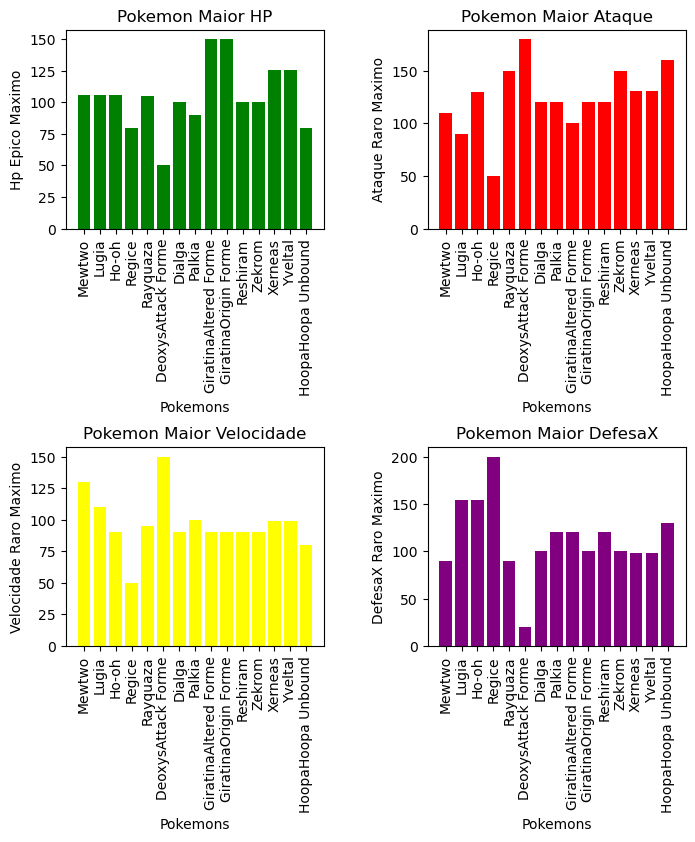

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo
valores1 = pokemonEpicoTops['hp']
valores2 = pokemonEpicoTops['ataque']
valores3 = pokemonEpicoTops['velocidade']
valores4 = pokemonEpicoTops['defesa_x']
nomeMaiorHp = pokemonEpicoTops['nome']
nomeMaiorAtaque = pokemonEpicoTops['nome']
nomeMaiorVelocidade = pokemonEpicoTops['nome']
nomeMaiorDefesaX = pokemonEpicoTops['nome']

# Cria a figura com duas linhas e duas colunas de subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))

# Cria o gráfico de barras na subplot superior esquerda
ax1.bar(np.arange(len(nomeMaiorHp)), valores1, color='green')
ax1.set_xticks(np.arange(len(nomeMaiorHp)))
ax1.set_xticklabels(nomeMaiorHp, rotation=90)
ax1.set_xlabel('Pokemons')
ax1.set_ylabel('Hp Epico Maximo')
ax1.set_title('Pokemon Maior HP')

# Cria o gráfico de barras na subplot superior direita
ax2.bar(np.arange(len(nomeMaiorAtaque)), valores2, color='red')
ax2.set_xticks(np.arange(len(nomeMaiorAtaque)))
ax2.set_xticklabels(nomeMaiorAtaque, rotation=90)
ax2.set_xlabel('Pokemons')
ax2.set_ylabel('Ataque Raro Maximo')
ax2.set_title('Pokemon Maior Ataque')

# Cria o gráfico de barras na subplot inferior esquerda
ax3.bar(np.arange(len(nomeMaiorVelocidade)), valores3, color='yellow')
ax3.set_xticks(np.arange(len(nomeMaiorVelocidade)))
ax3.set_xticklabels(nomeMaiorVelocidade, rotation=90)
ax3.set_xlabel('Pokemons')
ax3.set_ylabel('Velocidade Raro Maximo')
ax3.set_title('Pokemon Maior Velocidade')

# Cria o gráfico de barras na subplot inferior direita
ax4.bar(np.arange(len(nomeMaiorDefesaX)), valores4, color='purple')
ax4.set_xticks(np.arange(len(nomeMaiorDefesaX)))
ax4.set_xticklabels(nomeMaiorDefesaX, rotation=90)
ax4.set_xlabel('Pokemons')
ax4.set_ylabel('DefesaX Raro Maximo')
ax4.set_title('Pokemon Maior DefesaX')

# Ajusta a posição dos subplots
fig.subplots_adjust(hspace=1.1, wspace=0.4)

# Mostra o gráfico
plt.show()


In [99]:
## QUANTOS TIPOS EXistem na tabela EPICOS
pokemonEpicoTops.groupby(['tipo']).size()

tipo
Dark       1
Dragon     3
Fairy      1
Fire       1
Ghost      2
Ice        1
Psychic    4
Steel      1
Water      1
dtype: int64

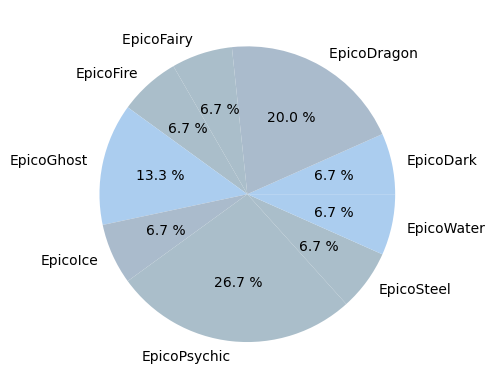

In [65]:
## QUAIS TIPO EPICOS QUE SÃO MAIS PRESENTES ---- POKEMONS DE CARDS BRILHANTES
EpicoDark     = pokemonEpicoTops.loc[pokemonEpicoTops['tipo'] == 'Dark'].count()[0]
EpicoDragon   = pokemonEpicoTops.loc[pokemonEpicoTops['tipo'] == 'Dragon'].count()[0]
EpicoFairy    = pokemonEpicoTops.loc[pokemonEpicoTops['tipo'] == 'Fairy'].count()[0]
EpicoFire     = pokemonEpicoTops.loc[pokemonEpicoTops['tipo'] == 'Fire'].count()[0]
EpicoGhost    = pokemonEpicoTops.loc[pokemonEpicoTops['tipo'] == 'Ghost'].count()[0]
EpicoIce      = pokemonEpicoTops.loc[pokemonEpicoTops['tipo'] == 'Ice'].count()[0]
EpicoPsychic  = pokemonEpicoTops.loc[pokemonEpicoTops['tipo'] == 'Psychic'].count()[0]
EpicoSteel    = pokemonEpicoTops.loc[pokemonEpicoTops['tipo'] == 'Steel'].count()[0]
EpicoWater    = pokemonEpicoTops.loc[pokemonEpicoTops['tipo'] == 'Water'].count()[0]

labels = ['EpicoDark', 'EpicoDragon ','EpicoFairy ','EpicoFire','EpicoGhost','EpicoIce','EpicoPsychic','EpicoSteel','EpicoWater']
colors = ['#abcdef','#aabbcc','#aabeca', '#aabeca','#abcdef','#aabbcc','#aabeca', '#aabeca','#abcdef']

plt.pie([EpicoDark , EpicoDragon, EpicoFairy, EpicoFire, EpicoGhost, EpicoIce, EpicoPsychic, EpicoSteel, EpicoWater], labels = labels, colors=colors, autopct='%.1f %%')

plt.show()

In [ ]:
### finalização analise dos pokemons Epicos #####

##  POKEMONS LENDÁRIOS - Análise

In [66]:
#Quantos são e quais são os Pokémons Lendários?
pokeLendario = tabelaPokemon.loc[tabelaPokemon['raridade'] == 'LENDARIO']
display(pokeLendario.head())
print(pokeLendario.shape)

,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
163,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,130,154,100,780,LENDARIO,1
164,MewtwoMega Mewtwo Y,Psychic,NO,106,150,70,140,194,120,780,LENDARIO,1
268,TyranitarMega Tyranitar,Rock,Dark,100,164,150,71,95,120,700,LENDARIO,2
409,SalamenceMega Salamence,Dragon,Flying,95,145,130,120,120,90,700,LENDARIO,3
413,MetagrossMega Metagross,Steel,Psychic,80,145,150,110,105,110,700,LENDARIO,3


(15, 12)


In [67]:
############################### PEGAR OS MELHORES POKEMONS LENDARIOS #################
# saber a capacidade de cada categoria.
print("-------------ATQ------------------")
print(pokeLendario['ataque'].min())
print(pokeLendario['ataque'].median())
print(pokeLendario['ataque'].max())
print("----------------------------------------")
#####################################
print("-------------DF-----------------")
print(pokeEpico['defesa'].min())
print(pokeEpico['defesa'].median())
print(pokeEpico['defesa'].max())
print("----------------------------------------")
#############################
print("-------------HP------------------")
print(pokeLendario['hp'].min())
print(pokeLendario['hp'].median())
print(pokeLendario['hp'].max())
print("----------------------------------------")
#####################################
print("-------------VEL------------------")
print(pokeLendario['velocidade'].min())
print(pokeLendario['velocidade'].median())
print(pokeLendario['velocidade'].max())
#display(pokemomComum['velocidade'].describe())
print("----------------------------------------")
############################################
print("-------------força_total------------------")
print(pokeLendario['força_total'].min())
print(pokeLendario['força_total'].median())
print(pokeLendario['força_total'].max())
#################################################3333
print("-------------ataque_x------------------")
print(pokeLendario['ataque_x'].describe())
#################################################3333
print("-------------defesa_x------------------")
print(pokeLendario['defesa_x'].describe())

-------------ATQ------------------
100
150.0
190
----------------------------------------
-------------DF-----------------
20
95.0
230
----------------------------------------
-------------HP------------------
50
100.0
125
----------------------------------------
-------------VEL------------------
71
110.0
140
----------------------------------------
-------------força_total------------------
700
700.0
780
-------------ataque_x------------------
count     15.000000
mean     144.533333
std       30.063900
min       95.000000
25%      120.000000
50%      150.000000
75%      165.000000
max      194.000000
Name: ataque_x, dtype: float64
-------------defesa_x------------------
count     15.000000
mean     111.666667
std       21.015867
min       90.000000
25%       97.500000
50%      110.000000
75%      120.000000
max      160.000000
Name: defesa_x, dtype: float64


In [84]:
# pokemons comuns com maior ataque,def,hp, etc, os mais fortes , combinados
display(pokeLendario.loc[pokeLendario['hp'] >= 125])
display(pokeLendario.loc[pokeLendario['ataque'] >= 190])
#display(pokeLendario.loc[(pokeLendarioo['ataque'] >= 120) & (pokeLendario['defesa'] >= 200)] )
display(pokeLendario.loc[pokeLendario['defesa'] >= 160])
display(pokeLendario.loc[pokeLendario['força_total'] >= 780])
display(pokeLendario.loc[pokeLendario['velocidade'] >= 140])
display(pokeLendario.loc[pokeLendario['defesa_x'] >= 160])
display(pokeLendario.loc[pokeLendario['ataque_x'] >= 194])

,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
711,KyuremBlack Kyurem,Dragon,Ice,125,170,100,95,120,90,700,LENDARIO,5
712,KyuremWhite Kyurem,Dragon,Ice,125,120,90,95,170,100,700,LENDARIO,5


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
163,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,130,154,100,780,LENDARIO,1


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
424,GroudonPrimal Groudon,Ground,Fire,100,180,160,90,150,90,770,LENDARIO,3


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
163,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,130,154,100,780,LENDARIO,1
164,MewtwoMega Mewtwo Y,Psychic,NO,106,150,70,140,194,120,780,LENDARIO,1
426,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,115,180,100,780,LENDARIO,3


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
164,MewtwoMega Mewtwo Y,Psychic,NO,106,150,70,140,194,120,780,LENDARIO,1


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
422,KyogrePrimal Kyogre,Water,NO,100,150,90,90,180,160,770,LENDARIO,3


,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
164,MewtwoMega Mewtwo Y,Psychic,NO,106,150,70,140,194,120,780,LENDARIO,1


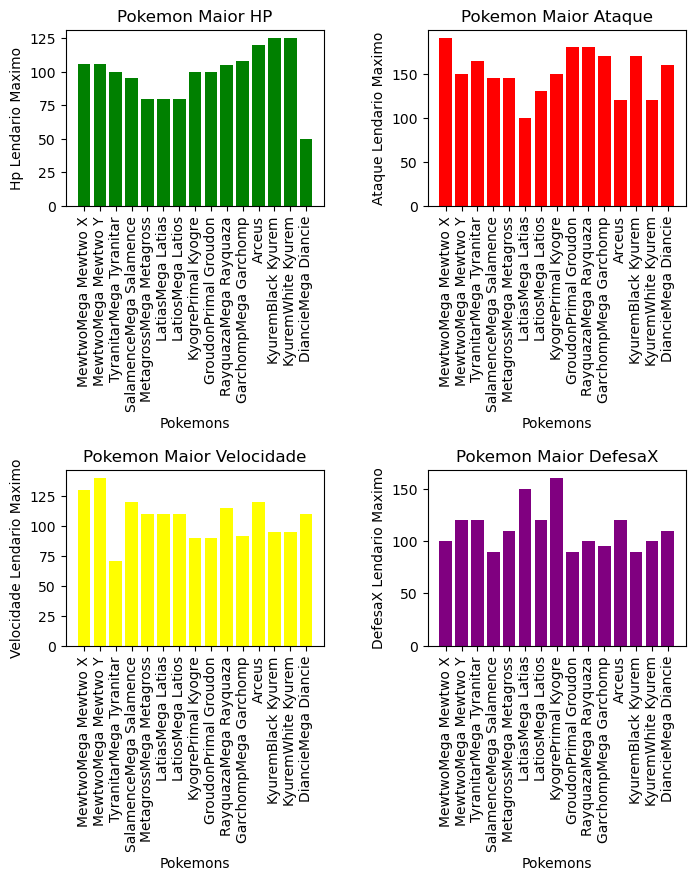

In [90]:
#### ANALISE DE TODOS POKEMONS LENDARIOS 
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo
valores1 = pokeLendario['hp']
valores2 = pokeLendario['ataque']
valores3 = pokeLendario['velocidade']
valores4 = pokeLendario['defesa_x']
nomeMaiorHp = pokeLendario['nome']
nomeMaiorAtaque = pokeLendario['nome']
nomeMaiorVelocidade = pokeLendario['nome']
nomeMaiorDefesaX = pokeLendario['nome']

# Cria a figura com duas linhas e duas colunas de subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))

# Cria o gráfico de barras na subplot superior esquerda
ax1.bar(np.arange(len(nomeMaiorHp)), valores1, color='green')
ax1.set_xticks(np.arange(len(nomeMaiorHp)))
ax1.set_xticklabels(nomeMaiorHp, rotation=90)
ax1.set_xlabel('Pokemons')
ax1.set_ylabel('Hp Lendario Maximo')
ax1.set_title('Pokemon Maior HP')

# Cria o gráfico de barras na subplot superior direita
ax2.bar(np.arange(len(nomeMaiorAtaque)), valores2, color='red')
ax2.set_xticks(np.arange(len(nomeMaiorAtaque)))
ax2.set_xticklabels(nomeMaiorAtaque, rotation=90)
ax2.set_xlabel('Pokemons')
ax2.set_ylabel('Ataque Lendario Maximo')
ax2.set_title('Pokemon Maior Ataque')

# Cria o gráfico de barras na subplot inferior esquerda
ax3.bar(np.arange(len(nomeMaiorVelocidade)), valores3, color='yellow')
ax3.set_xticks(np.arange(len(nomeMaiorVelocidade)))
ax3.set_xticklabels(nomeMaiorVelocidade, rotation=90)
ax3.set_xlabel('Pokemons')
ax3.set_ylabel('Velocidade Lendario Maximo')
ax3.set_title('Pokemon Maior Velocidade')

# Cria o gráfico de barras na subplot inferior direita
ax4.bar(np.arange(len(nomeMaiorDefesaX)), valores4, color='purple')
ax4.set_xticks(np.arange(len(nomeMaiorDefesaX)))
ax4.set_xticklabels(nomeMaiorDefesaX, rotation=90)
ax4.set_xlabel('Pokemons')
ax4.set_ylabel('DefesaX Lendario Maximo')
ax4.set_title('Pokemon Maior DefesaX')

# Ajusta a posição dos subplots
fig.subplots_adjust(hspace=1.5, wspace=0.4)

# Mostra o gráfico
plt.show()


In [88]:
## ANALISE GRAFICA GERAL DE TODOS POKEMONS LENDÀRIOS
pokeLendario.shape

(15, 12)

In [79]:
## EXPLORAÇÂO DOS POKEMONS MAIS TOPS LENDARIOS - BRILHANTE DIAMANTE
pokemonLendarioTops = pokeLendario.loc[pokeLendario['força_total'] >= 700]
pokemonLendarioTops

,nome,tipo,subtipo,hp,ataque,defesa,velocidade,ataque_x,defesa_x,força_total,raridade,geração
163,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,130,154,100,780,LENDARIO,1
164,MewtwoMega Mewtwo Y,Psychic,NO,106,150,70,140,194,120,780,LENDARIO,1
268,TyranitarMega Tyranitar,Rock,Dark,100,164,150,71,95,120,700,LENDARIO,2
409,SalamenceMega Salamence,Dragon,Flying,95,145,130,120,120,90,700,LENDARIO,3
413,MetagrossMega Metagross,Steel,Psychic,80,145,150,110,105,110,700,LENDARIO,3
418,LatiasMega Latias,Dragon,Psychic,80,100,120,110,140,150,700,LENDARIO,3
420,LatiosMega Latios,Dragon,Psychic,80,130,100,110,160,120,700,LENDARIO,3
422,KyogrePrimal Kyogre,Water,NO,100,150,90,90,180,160,770,LENDARIO,3
424,GroudonPrimal Groudon,Ground,Fire,100,180,160,90,150,90,770,LENDARIO,3
426,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,115,180,100,780,LENDARIO,3


In [80]:
## ANALISAR  QUANTOS TIPOs EXISTEM DE LENDARIOS

pokemonLendarioTops.groupby(['tipo']).size()

tipo
Dragon     7
Ground     1
Normal     1
Psychic    2
Rock       2
Steel      1
Water      1
dtype: int64

In [1]:
## Análise Grafica
## ANALISAR  QUANTOS TIPOs EXISTEM DE LENDARIOS EM GRAFICO PIZZA
lendarioDragon   = pokemonLendarioTops.loc[pokemonLendarioTops['tipo'] == 'Dragon'].count()[0]
lendarioGround   = pokemonLendarioTops.loc[pokemonLendarioTops['tipo'] == 'Ground'].count()[0]
lendarioFairy    = pokemonLendarioTops.loc[pokemonLendarioTops['tipo'] == 'Fairy'].count()[0]
lendarioNormal   = pokemonLendarioTops.loc[pokemonLendarioTops['tipo'] == 'Normal'].count()[0]
lendarioPsychic  = pokemonLendarioTops.loc[pokemonLendarioTops['tipo'] == 'Psychic'].count()[0]
lendarioRock     = pokemonLendarioTops.loc[pokemonLendarioTops['tipo'] == 'Rock'].count()[0]
lendarioSteel    = pokemonLendarioTops.loc[pokemonLendarioTops['tipo'] == 'Steel'].count()[0]
lendarioWater    = pokemonLendarioTops.loc[pokemonLendarioTops['tipo'] == 'Water'].count()[0]

labels = ['lendarioDragon', 'lendarioGround','lendarioFairy','lendarioNormal','lendarioPsychic','lendarioRock','lendarioSteel','lendarioWater']
colors = ['#abcdef','#aabbcc','#aabeca', '#aabeca','#abcdef','#aabbcc','#aabeca', '#aabeca','#abcdef']

plt.pie([lendarioDragon , lendarioGround, lendarioFairy, lendarioNormal, lendarioPsychic, lendarioRock, lendarioSteel, lendarioWater], labels = labels, colors=colors, autopct='%.1f %%')

plt.show()

NameError: name 'pokemonLendarioTops' is not defined

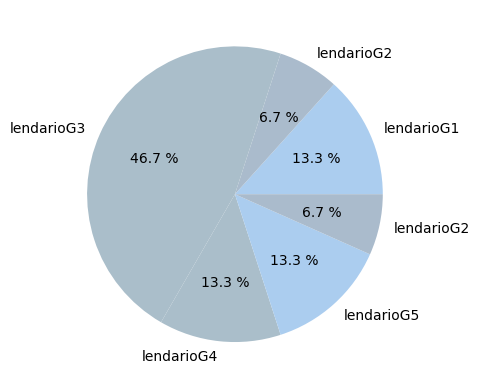

In [131]:
##  A GERAÇAO DOS POKEMONS lendarios 

lendarioG1 =  pokemonLendarioTops.loc[pokemonLendarioTops['geração'] == 1].count()[0]
lendarioG2 =  pokemonLendarioTops.loc[pokemonLendarioTops['geração'] == 2].count()[0]
lendarioG3  = pokemonLendarioTops.loc[pokemonLendarioTops['geração'] == 3].count()[0]
lendarioG4  = pokemonLendarioTops.loc[pokemonLendarioTops['geração'] == 4].count()[0]
lendarioG5  = pokemonLendarioTops.loc[pokemonLendarioTops['geração'] == 5].count()[0]
lendarioG6  = pokemonLendarioTops.loc[pokemonLendarioTops['geração'] == 6].count()[0]

labels = ['lendarioG1', 'lendarioG2','lendarioG3','lendarioG4','lendarioG5' ,'lendarioG2']
colors = ['#abcdef','#aabbcc','#aabeca', '#aabeca','#abcdef','#aabbcc']

plt.pie([lendarioG1 , lendarioG2, lendarioG3, lendarioG4, lendarioG5, lendarioG6], labels = labels, colors=colors, autopct='%.1f %%')

plt.show()

In [17]:
################# FIM LENDARIOS ############################# 